In [9]:
import datetime as dt #For inputing any date or time information
from datetime import timezone #For inputing timezones
from google.cloud import bigquery          #The BigQuery API
import matplotlib.pyplot as plt      #For plotting
import numpy as np                         #For scientific computation
import os                            #For work with native operating system and directories
from pathlib import Path             #For working with file paths and directories
import pydata_google_auth                  #For authentication against Google 
import pandas as pd                        #For data manipulation and bgq --> pandas conversion
import pandas_gbq as pd_gbq #Import BigQuery data to create a pandas dataframe
import plotly.graph_objects as go # interactive plots
import pytz #For timezone calculations
import seaborn as sns                #For plotting
import warnings
import datetime

In [10]:
query = """
SELECT
  CUSTOMER_NUMBER,
  ENTERPRISE_ACCOUNT_NO,
  ENTERPRISE_ACCOUNT_NAME,
  NATIONAL_ACCOUNT,
  PAYER,
  DOCUMENT_DATE_IN_DOCUMENT,
  DOCUMENT_TYPE,
  POSTING_KEY_NAME,
  AMOUNT_IN_LOCAL_CURRENCY,
  CREDIT_CONTROL_AREA,
  AR_STATUS,
  PAYMENT_DATE,
  CC_DAYS_TO_ADD,
  TERMS_OF_PAYMENT_KEY  
FROM
  `edna-data-pr-cah.VW_CORP_GFSS_NP.VW_AR_AGING`
WHERE
  (DOCUMENT_TYPE IN ('ZF',
      'VF', 'DH', 'DL', 'DZ', 'DW', 'DC'))
    AND ("2024-01-01" >=PAYMENT_DATE)
ORDER BY
  PAYMENT_DATE
"""

In [3]:
# Import the data with imputation
bqclient = bigquery.Client()
df = bqclient.query(query).to_dataframe()

In [4]:
df

,CUSTOMER_NUMBER,ENTERPRISE_ACCOUNT_NO,ENTERPRISE_ACCOUNT_NAME,NATIONAL_ACCOUNT,PAYER,DOCUMENT_DATE_IN_DOCUMENT,DOCUMENT_TYPE,POSTING_KEY_NAME,AMOUNT_IN_LOCAL_CURRENCY,CREDIT_CONTROL_AREA,AR_STATUS,PAYMENT_DATE,CC_DAYS_TO_ADD,TERMS_OF_PAYMENT_KEY
0,2057199296,,,0000041400,2057199296,2023-08-23,ZF,01 - Invoice,14926.590000000,PD,CLEAR,2007-12-13,5.000000000,YS05
1,2057199296,,,0000041400,2057199296,2023-08-22,ZF,01 - Invoice,1111.470000000,PD,CLEAR,2007-12-13,5.000000000,YS05
2,2057199296,,,0000041400,2057199296,2023-08-24,ZF,01 - Invoice,263.950000000,PD,CLEAR,2007-12-13,5.000000000,YS05
3,2057199296,,,0000041400,2057199296,2023-08-25,ZF,01 - Invoice,2578.660000000,PD,CLEAR,2007-12-13,5.000000000,YS05
4,2057199296,,,0000041400,2057199296,2023-08-24,ZF,11 - Credit memo,-45.690000000,PD,CLEAR,2007-12-13,0E-9,YS05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50459533,0011139510,7100000255,7100000255 - ADVENTIST HEALTH,,None,2022-04-27,DH,16 - Payment difference,-60.940000000,Z2140,CLEAR,2023-12-22,0E-9,
50459534,0011139510,7100000255,7100000255 - ADVENTIST HEALTH,,None,2022-04-27,DH,16 - Payment difference,-60.940000000,Z2140,CLEAR,2023-12-22,0E-9,
50459535,0011139510,7100000255,7100000255 - ADVENTIST HEALTH,,None,2022-02-08,DH,16 - Payment difference,-995.430000000,Z2140,CLEAR,2023-12-22,0E-9,
50459536,0011139510,7100000255,7100000255 - ADVENTIST HEALTH,,None,2022-03-31,DH,16 - Payment difference,-6.390000000,Z2140,CLEAR,2023-12-22,0E-9,


# Step 1
- ### Search by:
    - CUSTOMER_NUMBER
    - ENTERPRISE_ACCOUNT_NO
    

## Search by CUSTOMER_NUMBER
customer = "2057194397"

## Final Product
**Year Month CREDIT_CONTROL_AREA CC_DAYS_TO_ADD WAPD**

0	2022	Dec 	PD	 28.0000	                     30.0434

1	2022	Nov 	PD	 28.0000	                     29.9682

2	2022	Oct 	PD	 28.0000  	                 29.9637

3	2022	Sep 	PD	 28.0000	                     29.9744

4	2023	Apr 	PD	 28.0000	                     24.8993

5	2023	Aug 	PD	 28.0000	                     26.6483

6	2023	Feb 	PD	 28.0000	                     28.5953

7	2023	Jan 	PD	 28.0000	                     29.7159

8	2023	Jul 	PD	 28.0000	                     25.0257

9	2023	Jun 	PD	 28.0000	                     25.7423

10	2023	Mar 	PD	 28.0000	                     25.1921

11	2023	May 	PD	 28.0000	                     24.3104

12	2023	Sep 	PD	 28.0000	                     27.9685


In [12]:
query = """
SELECT
  CUSTOMER_NUMBER,
  ENTERPRISE_ACCOUNT_NO,
  ENTERPRISE_ACCOUNT_NAME,
  NATIONAL_ACCOUNT,
  PAYER,
  DOCUMENT_DATE_IN_DOCUMENT,
  DOCUMENT_TYPE,
  POSTING_KEY_NAME,
  AMOUNT_IN_LOCAL_CURRENCY,
  CREDIT_CONTROL_AREA,
  AR_STATUS,
  PAYMENT_DATE,
  CC_DAYS_TO_ADD,
  TERMS_OF_PAYMENT_KEY  
FROM
  `edna-data-pr-cah.VW_CORP_GFSS_NP.VW_AR_AGING`
WHERE
  (DOCUMENT_TYPE IN ('ZF',
      'VF', 'DH', 'DL', 'DZ', 'DW', 'DC'))
    AND ("2024-01-01" >=PAYMENT_DATE)
    AND CUSTOMER_NUMBER = "2057194397" 
ORDER BY
  PAYMENT_DATE
"""

In [13]:
bqclient = bigquery.Client()
df_customer = bqclient.query(query).to_dataframe()

In [8]:
df_customer.CUSTOMER_NUMBER.unique()

array(['2057194397'], dtype=object)

# Step 2:
- Create new columns
    - Sub Payment Date from Invoice Date
    - Weighted Invoice Value
    - WAPD

In [47]:
# Sub Payment Date from Invoice Date
query = """
SELECT
  CUSTOMER_NUMBER,
  ENTERPRISE_ACCOUNT_NO,
  ENTERPRISE_ACCOUNT_NAME,
  NATIONAL_ACCOUNT,
  PAYER,
  DOCUMENT_DATE_IN_DOCUMENT,
  DOCUMENT_TYPE,
  POSTING_KEY_NAME,
  AMOUNT_IN_LOCAL_CURRENCY,
  CREDIT_CONTROL_AREA,
  AR_STATUS,
  PAYMENT_DATE,
  CC_DAYS_TO_ADD,
  TERMS_OF_PAYMENT_KEY,
  DATE_DIFF(CAST(PAYMENT_DATE AS DATE), CAST(DOCUMENT_DATE_IN_DOCUMENT AS DATE), DAY) AS sub_Payment_Date_from_Invoice_Date
FROM
  `edna-data-pr-cah.VW_CORP_GFSS_NP.VW_AR_AGING`
WHERE
  (DOCUMENT_TYPE IN ('ZF',
      'VF', 'DH', 'DL', 'DZ', 'DW', 'DC'))
    AND ("2024-01-01" >=PAYMENT_DATE)
    AND CUSTOMER_NUMBER = "2057194397" 
ORDER BY
  PAYMENT_DATE
"""

In [48]:
bqclient = bigquery.Client()
df_customer_sub = bqclient.query(query).to_dataframe()

In [22]:
# Weighted Invoice Value
query = """
SELECT
  CUSTOMER_NUMBER,
  ENTERPRISE_ACCOUNT_NO,
  ENTERPRISE_ACCOUNT_NAME,
  NATIONAL_ACCOUNT,
  PAYER,
  DOCUMENT_DATE_IN_DOCUMENT,
  DOCUMENT_TYPE,
  POSTING_KEY_NAME,
  AMOUNT_IN_LOCAL_CURRENCY,
  CREDIT_CONTROL_AREA,
  AR_STATUS,
  PAYMENT_DATE,
  CC_DAYS_TO_ADD,
  TERMS_OF_PAYMENT_KEY,
  DATE_DIFF(CAST(PAYMENT_DATE AS DATE), CAST(DOCUMENT_DATE_IN_DOCUMENT AS DATE), DAY) * AMOUNT_IN_LOCAL_CURRENCY AS weighted_Invoice_Value
FROM
  `edna-data-pr-cah.VW_CORP_GFSS_NP.VW_AR_AGING`
WHERE
  (DOCUMENT_TYPE IN ('ZF',
      'VF', 'DH', 'DL', 'DZ', 'DW', 'DC'))
    AND ("2024-01-01" >=PAYMENT_DATE)
    AND CUSTOMER_NUMBER = "2057194397" 
ORDER BY
  PAYMENT_DATE
"""

In [23]:
bqclient = bigquery.Client()
df_customer_sub_weight = bqclient.query(query).to_dataframe()

In [19]:
# Weighted Invoice Value
# 90 days ago
query = """
SELECT
  CUSTOMER_NUMBER,
  ENTERPRISE_ACCOUNT_NO,
  ENTERPRISE_ACCOUNT_NAME,
  NATIONAL_ACCOUNT,
  PAYER,
  DOCUMENT_DATE_IN_DOCUMENT,
  DOCUMENT_TYPE,
  POSTING_KEY_NAME,
  AMOUNT_IN_LOCAL_CURRENCY,
  CREDIT_CONTROL_AREA,
  AR_STATUS,
  PAYMENT_DATE,
  CC_DAYS_TO_ADD,
  TERMS_OF_PAYMENT_KEY,
  DATE_DIFF(CAST(PAYMENT_DATE AS DATE), CAST(DOCUMENT_DATE_IN_DOCUMENT AS DATE), DAY) * AMOUNT_IN_LOCAL_CURRENCY AS weighted_Invoice_Value,
  (CAST(PAYMENT_DATE AS DATE)-90) AS ninty_days_ago
FROM
  `edna-data-pr-cah.VW_CORP_GFSS_NP.VW_AR_AGING`
WHERE
  (DOCUMENT_TYPE IN ('ZF',
      'VF', 'DH', 'DL', 'DZ', 'DW', 'DC'))
    AND ("2024-01-01" >=PAYMENT_DATE)
    AND CUSTOMER_NUMBER = "2057194397" 
ORDER BY
  PAYMENT_DATE
"""

In [20]:
bqclient = bigquery.Client()
df_customer_sub_weight_90 = bqclient.query(query).to_dataframe()

In [47]:
# Weighted Invoice Value
# 90 days ago
# WAPD
query = """

SELECT
  CUSTOMER_NUMBER,
  ENTERPRISE_ACCOUNT_NO,
  ENTERPRISE_ACCOUNT_NAME,
  NATIONAL_ACCOUNT,
  PAYER,
  DOCUMENT_DATE_IN_DOCUMENT,
  DOCUMENT_TYPE,
  POSTING_KEY_NAME,
  AMOUNT_IN_LOCAL_CURRENCY,
  CREDIT_CONTROL_AREA,
  AR_STATUS,
  PAYMENT_DATE,
  CC_DAYS_TO_ADD,
  TERMS_OF_PAYMENT_KEY,
  DATE_DIFF(CAST(PAYMENT_DATE AS DATE), CAST(DOCUMENT_DATE_IN_DOCUMENT AS DATE), DAY) * AMOUNT_IN_LOCAL_CURRENCY AS weighted_Invoice_Value,
  (CAST(PAYMENT_DATE AS DATE)-90) AS ninty_days_ago,

(
SELECT
  PAYMENT_DATE,
  DOCUMENT_DATE_IN_DOCUMENT,
  AMOUNT_IN_LOCAL_CURRENCY,
  (
  (SUM(DATE_DIFF(CAST(PAYMENT_DATE AS DATE), CAST(DOCUMENT_DATE_IN_DOCUMENT AS DATE), DAY) * AMOUNT_IN_LOCAL_CURRENCY))/(SUM(AMOUNT_IN_LOCAL_CURRENCY))
  )
FROM
  `edna-data-pr-cah.VW_CORP_GFSS_NP.VW_AR_AGING`
WHERE
  DOCUMENT_DATE_IN_DOCUMENT BETWEEN PAYMENT_DATE AND (CAST(PAYMENT_DATE AS DATE)-90) 
GROUP BY
  PAYMENT_DATE,
  DOCUMENT_DATE_IN_DOCUMENT,
  AMOUNT_IN_LOCAL_CURRENCY
)


FROM
  `edna-data-pr-cah.VW_CORP_GFSS_NP.VW_AR_AGING`
WHERE
  (DOCUMENT_TYPE IN ('ZF',
      'VF', 'DH', 'DL', 'DZ', 'DW', 'DC'))
    AND ("2024-01-01" >=PAYMENT_DATE)
    AND CUSTOMER_NUMBER = "2057194397" 
    AND PAYMENT_DATE IS NOT NULL 
    AND DOCUMENT_DATE_IN_DOCUMENT IS NOT NULL
 

ORDER BY
  PAYMENT_DATE

"""

In [48]:
bqclient = bigquery.Client()
df_customer_sub_weight_90_WAPD = bqclient.query(query).to_dataframe()

BadRequest: 400 Scalar subquery cannot have more than one column unless using SELECT AS STRUCT to build STRUCT values at [21:1]

Location: US
Job ID: be18db8a-c34c-4b5e-988c-5b956c2b5603


In [17]:
df_customer_sub_weight_90_WAPD.head()

,CUSTOMER_NUMBER,ENTERPRISE_ACCOUNT_NO,ENTERPRISE_ACCOUNT_NAME,NATIONAL_ACCOUNT,PAYER,DOCUMENT_DATE_IN_DOCUMENT,DOCUMENT_TYPE,POSTING_KEY_NAME,AMOUNT_IN_LOCAL_CURRENCY,CREDIT_CONTROL_AREA,AR_STATUS,PAYMENT_DATE,CC_DAYS_TO_ADD,TERMS_OF_PAYMENT_KEY,weighted_Invoice_Value,ninty_days_ago
0,2057194397,7100004137,7100004137 - CONVERSIO HEALTH,0000000101,2057194397,2022-08-05,DH,15 - Incoming payment,-17577.280000000,PD,CLEAR,2022-08-05,0E-9,,0E-9,2022-05-07
1,2057194397,7100004137,7100004137 - CONVERSIO HEALTH,0000000101,2057194397,2022-08-12,DH,15 - Incoming payment,-18767.470000000,PD,CLEAR,2022-08-12,0E-9,,0E-9,2022-05-14
2,2057194397,7100004137,7100004137 - CONVERSIO HEALTH,0000000101,2057194397,2022-08-19,DH,15 - Incoming payment,-23316.380000000,PD,CLEAR,2022-08-19,0E-9,,0E-9,2022-05-21
3,2057194397,7100004137,7100004137 - CONVERSIO HEALTH,0000000101,2057194397,2022-08-26,DH,15 - Incoming payment,-18067.580000000,PD,CLEAR,2022-08-26,0E-9,,0E-9,2022-05-28
4,2057194397,7100004137,7100004137 - CONVERSIO HEALTH,0000000101,2057194397,2022-08-04,ZF,01 - Invoice,38.500000000,PD,CLEAR,2022-09-02,28.000000000,YS28,1116.500000000,2022-06-04


In [29]:
query = """
Select

Customer_Number,

Payment_Month,
CREDIT_CONTROL_AREA,
TERMS_OF_PAYMENT_KEY,

round((AVG((sum(WEIGHTED_INV_VALUE))/(sum(INVOICE_VALUE))) over(partition by CUSTOMER_NUMBER  )),2) AS OVERALL_WAPD, --Still need to find out how to pull only last 90 days

Case

  when (END_DATE between START_DATE and END_DATE) then round(((sum(WEIGHTED_INV_VALUE))/(sum(INVOICE_VALUE))),2)

ELSE (CAST ('0' as int))

END Three_MONTH_AVG_WAPD

From

(

 

SELECT CUSTOMER_NUMBER,  DATE_TRUNC(PAYMENT_DATE, MONTH) AS Payment_month,Payment_date as END_DATE, ninty_days_ago as START_DATE,CREDIT_CONTROL_AREA,
TERMS_OF_PAYMENT_KEY,

sum(AMOUNT_IN_LOCAL_CURRENCY) as INVOICE_VALUE,

sum(weighted_Invoice_Value) as WEIGHTED_INV_VALUE,

--round(avg(sum(weighted_Invoice_Value)/sum(AMOUNT_IN_LOCAL_CURRENCY)) over(partition by CUSTOMER_NUMBER, (order by (date_diff(Payment_DATE, ninty_days_ago, month)) asc range between 3 preceding and current row))),2) as WAPD

 

 

/*CASE

  WHEN ( PAYMENT_DATE BETWEEN PAYMENT_DATE AND ninty_days_ago) THEN (sum(weighted_Invoice_Value)/sum(AMOUNT_IN_LOCAL_CURRENCY) )

 

   ELSE (CAST('0' as int) )

  END WAPD*/

 

FROM (

SELECT

  CUSTOMER_NUMBER,

  ENTERPRISE_ACCOUNT_NO

  ENTERPRISE_ACCOUNT_NAME,

  NATIONAL_ACCOUNT,

  PAYER,

  DOCUMENT_DATE_IN_DOCUMENT,

  ACCOUNTING_DOCUMENT_NUMBER,

  ACCOUNTING_DOCUMENT_LINE_ITEM,

  POSTING_DATE_IN_DOCUMENT,

  DOCUMENT_TYPE,

  DOCUMENT_YEAR,

  DOCUMENT_MONTH,

  POSTING_KEY_NAME,

  AMOUNT_IN_LOCAL_CURRENCY,

  CREDIT_CONTROL_AREA,

  AR_STATUS,

  PAYMENT_DATE,

  CC_DAYS_TO_ADD,

  TERMS_OF_PAYMENT_KEY,

   DATE_DIFF(CAST(PAYMENT_DATE AS DATE), CAST(DOCUMENT_DATE_IN_DOCUMENT AS DATE), DAY) as Open_Days,

  DATE_DIFF(CAST(PAYMENT_DATE AS DATE), CAST(DOCUMENT_DATE_IN_DOCUMENT AS DATE), DAY) * AMOUNT_IN_LOCAL_CURRENCY AS weighted_Invoice_Value,

   

  (CAST(PAYMENT_DATE AS DATE)-90) AS ninty_days_ago

 

FROM

  `edna-data-pr-cah.VW_CORP_GFSS_NP.VW_AR_AGING`

WHERE

  POSTING_KEY = '01'

    AND ("2024-01-01" >=PAYMENT_DATE)

    AND CUSTOMER_NUMBER = "2057194397"

    AND PAYMENT_DATE IS NOT NULL

    AND DOCUMENT_DATE_IN_DOCUMENT IS NOT NULL

    AND AR_STATUS = "CLEAR"

 

GROUP BY

 CUSTOMER_NUMBER,

  ENTERPRISE_ACCOUNT_NO,

  ENTERPRISE_ACCOUNT_NAME,

  NATIONAL_ACCOUNT,

  PAYER,

  DOCUMENT_DATE_IN_DOCUMENT,

  ACCOUNTING_DOCUMENT_NUMBER,

  ACCOUNTING_DOCUMENT_LINE_ITEM,

  POSTING_DATE_IN_DOCUMENT,

  DOCUMENT_TYPE,

  POSTING_KEY_NAME,

  AMOUNT_IN_LOCAL_CURRENCY,

  CREDIT_CONTROL_AREA,

  AR_STATUS,

  PAYMENT_DATE,

  CC_DAYS_TO_ADD,

  DOCUMENT_YEAR,

  DOCUMENT_MONTH,

  TERMS_OF_PAYMENT_KEY

ORDER BY

  PAYMENT_DATE)

 

  Group BY

  CUSTOMER_NUMBER,  Document_month  ,Payment_date,DATE_TRUNC(PAYMENT_DATE, MONTH),ninty_days_ago, Payment_date,CREDIT_CONTROL_AREA, TERMS_OF_PAYMENT_KEY

 

  ORDER BY Document_month DESC )

 

  WHERE Payment_month >=  Payment_month-3

  GROUP BY Customer_Number, Payment_Month, END_DATE, START_DATE,CREDIT_CONTROL_AREA,TERMS_OF_PAYMENT_KEY

  ORDER BY Payment_month
  """

In [30]:
bqclient = bigquery.Client()
df_customer_Crystal= bqclient.query(query).to_dataframe()

In [83]:
df_customer_Crystal

,Customer_Number,Payment_Month,CREDIT_CONTROL_AREA,TERMS_OF_PAYMENT_KEY,OVERALL_WAPD,Three_MONTH_AVG_WAPD,month,year
0,2057194397,2022-09-01,PD,YS28,27.460000000,29.840000000,Sep,2022
1,2057194397,2022-09-01,PD,YS28,27.460000000,30.040000000,Sep,2022
2,2057194397,2022-09-01,PD,YS28,27.460000000,30.610000000,Sep,2022
3,2057194397,2022-09-01,PD,YS28,27.460000000,30.080000000,Sep,2022
4,2057194397,2022-09-01,PD,YS28,27.460000000,29.910000000,Sep,2022
...,...,...,...,...,...,...,...,...
57,2057194397,2023-08-01,PD,YS28,27.460000000,30.410000000,Aug,2023
58,2057194397,2023-09-01,PD,YS28,27.460000000,30.110000000,Sep,2023
59,2057194397,2023-09-01,PD,YS28,27.460000000,30.010000000,Sep,2023
60,2057194397,2023-09-01,PD,YS28,27.460000000,29.820000000,Sep,2023


In [103]:
int(df_customer_Crystal.TERMS_OF_PAYMENT_KEY.values[0][2:4])

28

In [42]:
df_customer_Crystal['Payment_Month']=pd.to_datetime(df_customer_Crystal['Payment_Month'])
df_customer_Crystal['Payment_Month'].dt.strftime('%b')

0     Sep
1     Sep
2     Sep
3     Sep
4     Sep
     ... 
57    Aug
58    Sep
59    Sep
60    Sep
61    Sep
Name: Payment_Month, Length: 62, dtype: object

In [92]:
def final_dataFram(toFix_df):
    toFix_df['month'] = toFix_df['Payment_Month'].dt.strftime('%b')
    toFix_df['year'] = toFix_df['Payment_Month'].dt.strftime('%Y')
    df_final = pd.DataFrame({'Year': toFix_df.year,
                   'Month': toFix_df.month,
                   'CREDIT_CONTROL_AREA': toFix_df.CREDIT_CONTROL_AREA,
                   'WAPD':toFix_df.Three_MONTH_AVG_WAPD,
                    "TERMS_OF_PAYMENT_KEY":toFix_df.TERMS_OF_PAYMENT_KEY})
    dfff = (
        df_final
        .filter(["Year", "Month","CREDIT_CONTROL_AREA","WAPD","TERMS_OF_PAYMENT_KEY"])
        .groupby(['Year','Month','CREDIT_CONTROL_AREA',"TERMS_OF_PAYMENT_KEY"])
        .agg({'WAPD' : ['mean']})
        .sort_values(['Year',"Month","TERMS_OF_PAYMENT_KEY"])
        .reset_index()
    )
    dfff.columns = ['Year','Month', 'CREDIT_CONTROL_AREA','TERMS_OF_PAYMENT_KEY',"WAPD"]
    get_graph(dfff)
    return dfff.head(65)

In [104]:
def get_graph(finished_df):
    dff = pd.DataFrame(
        dict(
            year=finished_df.Year.values ,
            month=finished_df.Month.values,
            CCA= finished_df.CREDIT_CONTROL_AREA.values,
            WAPD=finished_df.WAPD.values,
            dso_term = int(finished_df.TERMS_OF_PAYMENT_KEY.values[0][2:4])
        )
    )

    fig = go.Figure()
    # fig = make_subplots(1,1)

    fig.update_layout(
        template="none",
        xaxis=dict(title_text="Year"),
        yaxis=dict(title_text="WAPD"),
        barmode="group",
    )

    colors = ["#456e73","#2A66DE", "#FFC32B","#457353"]

    for r, c in zip(dff.CCA.unique(), colors):
        plot_df = dff[dff.CCA == r]
        fig.add_trace(go.Bar(x=[plot_df.year, plot_df.month], y=plot_df.WAPD, name=r, marker_color=c))


    fig.add_trace(go.Scatter(x= [dff.year, dff.month], y=dff.dso_term, mode = 'lines',name = "DSO Term"))


    # fig.plot(fi.CC_DAYS_TO_ADD, c = "y", label = "DSO Term",zorder=10)
    fig.update_layout(title='WAPD')
    fig.show()

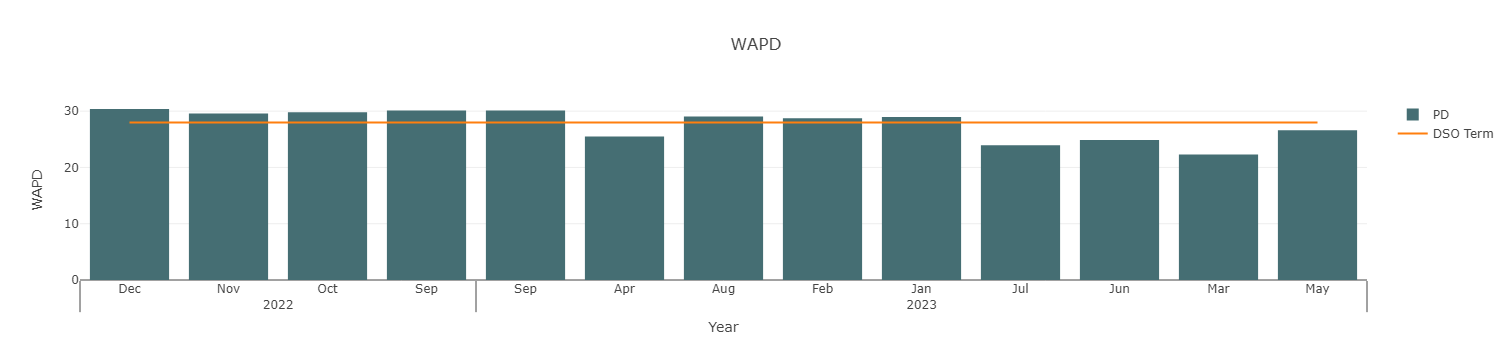

,Year,Month,CREDIT_CONTROL_AREA,TERMS_OF_PAYMENT_KEY,WAPD
0,2022,Dec,PD,YS28,30.384000
1,2022,Nov,PD,YS28,29.586000
2,2022,Oct,PD,YS28,29.820000
3,2022,Sep,PD,YS28,30.096000
4,2023,Apr,PD,YS28,25.514286
5,2023,Aug,PD,YS28,29.070000
6,2023,Feb,PD,YS28,28.720000
7,2023,Jan,PD,YS28,28.970000
8,2023,Jul,PD,YS28,23.932500
9,2023,Jun,PD,YS28,24.887500


In [105]:
final_dataFram(df_customer_Crystal)